In [1]:
# Loading data and displaying for visualization

import pandas as pd
df=pd.read_csv('Copper.csv')
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_7728\1582395619.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Copper.csv')


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [2]:
# dropping the columns that obviously doesn't have any corelation with price
# price can depend on date factor but since item date and delivery date are related so keeping 
# one of them e.g.item date.

df = df.drop(['material_ref'],axis=1)
df = df.drop(['id'],axis=1)
df = df.drop(['product_ref'],axis=1)
df = df.drop(['customer'],axis=1)
df = df.drop(['delivery date'],axis=1)

In [3]:
# Not sure about 'application' column. Let's check the values it has.

df['application'].unique()

array([10., 41., 28., 59., 15.,  4., 38., 56., 42., 26., 27., 19., 20.,
       66., 29., 22., 40., 25., 67., 79.,  3., 99.,  2.,  5., 39., 69.,
       70., 65., 58., 68., nan])

In [4]:
# checking the correlation, it is significant so we should keep it

df['application'].corr(df['selling_price'])

0.001461511796643426

In [5]:
# checking null values in application

print(df['application'].isna().sum())

24


In [6]:
# removing the rows with null values

df = df.drop(df[df['application'].isna()].index)

In [7]:
# checking for nan values in item_date

print(df['item_date'].isna().sum())

1


In [8]:
df = df.drop(df[df['item_date'].isna()].index)

In [9]:
# Transforming item_date into pandas datetime format

df['item_date']=df['item_date'].apply(lambda x: str(x))
df['item_date']=df['item_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])

In [10]:
# Got error msg for this date as month and date can't be 0, so removing it

df[['item_date']][df['item_date']=='1995-00-00']

,item_date
52,1995-00-00


In [11]:
df = df.drop(df[df['item_date']=='1995-00-00'].index)

In [12]:
# Got error msg for this date as month can't be 19, so removing it

df[['item_date']][df['item_date']=='2019-19-19']

,item_date
105485,2019-19-19


In [13]:
df = df.drop(df[df['item_date']=='2019-19-19'].index)

In [14]:
#from datetime import datetime

df['item_date']=pd.to_datetime(df['item_date'])

In [15]:
# extracting date related columns from the item_date and then dropping the original column

import datetime as dt
df['year']=df['item_date'].dt.year
df['month']=df['item_date'].dt.month
df['day']=df['item_date'].dt.day
df['dayofweek']=df['item_date'].dt.dayofweek

df = df.drop(['item_date'],axis=1)

In [16]:
# error in rounding off the values, so eliminating row with 'e'

df[['quantity tons']][df['quantity tons']=='e']

,quantity tons
173086,e


In [17]:
df = df.drop(df[df['quantity tons']=='e'].index)

In [18]:
# rounding off quantity tons to 2 decimal places

df['quantity tons']=df['quantity tons'].apply(lambda x:round(float(x),2))

In [19]:
# checking for negative values

df[['quantity tons']][df['quantity tons']<0]

,quantity tons
105730,-4.00
131473,-1.48
181661,-18.00
181671,-2000.00


In [20]:
# some values are too small to be real to putting a threshold of 0.01 to eliminate ~0 and negatives

df = df.drop(df[df['quantity tons']<0.01].index)

In [21]:
# some values are too large to be true. Eliminating those values

df[['quantity tons']][df['quantity tons']>100000]

,quantity tons
173022,1.000000e+09
173211,5.000000e+07


In [22]:
df = df.drop(df[df['quantity tons']>100000].index)

In [23]:
# Country can be an important determinant of price. So identifying null values
# and deleting them

print(df['country'].isna().sum())

4


In [24]:
df = df.drop(df[df['country'].isna()].index)

In [25]:
# Checking the item type
# Since there are only 7 values, we can go for one hot encoding

df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [26]:
# renaming the column and performing one hot encoding
# dropping the original column afterwards

df = df.rename(columns={'item type': 'item_type'})
df=pd.concat([df,pd.get_dummies(df.item_type).add_prefix('item_type_')],axis=1)
df=df.drop('item_type',axis=1)


In [27]:
# identifying null values in thickness and eliminating those

print(df['thickness'].isna().sum())

1


In [28]:
df = df.drop(df[df['thickness'].isna()].index)

In [29]:
# Checking for disproportionately high thickness and eliminating

df[['thickness']][df['thickness']>50]

,thickness
41,2500.0
45001,400.0


In [30]:
df = df.drop(df[df['thickness']>50].index)

In [31]:
# checking for null values in width

print(df['width'].isna().sum())

0


In [32]:
# checking for comparatively very low values of width

df[['width']][df['width']<20]

,width
526,1.0


In [33]:
df = df.drop(df[df['width']<20].index)


In [34]:
# checking for null values in selling_price and eliminating them

print(df['selling_price'].isna().sum())

1


In [35]:
df = df.drop(df[df['selling_price'].isna()].index)

In [36]:
# some prices are negative or very low, That doesn't make sense so has to be removed

df[['selling_price']][df['selling_price']<5]

,selling_price
28,-1160.0
44761,-730.0
44810,-445.0
44865,-25.0
45358,0.0
45505,0.1
105189,-336.0


In [37]:
df = df.drop(df[df['selling_price']<500].index)

In [38]:
# checking for disproportionately high prices and eliminating those

df[['selling_price']][df['selling_price']>10000]

,selling_price
10228,1.000009e+08
36192,1.000010e+08
123570,8.123614e+04
124547,1.091300e+04


In [39]:
df = df.drop(df[df['selling_price']>6000].index)

In [40]:
# Converting the boolean columns to intergers

df['item_type_IPL']=df['item_type_IPL'].astype(int)
df['item_type_Others']=df['item_type_Others'].astype(int)
df['item_type_PL']=df['item_type_PL'].astype(int)
df['item_type_S']=df['item_type_S'].astype(int)
df['item_type_SLAWR']=df['item_type_SLAWR'].astype(int)
df['item_type_W']=df['item_type_W'].astype(int)
df['item_type_WI']=df['item_type_WI'].astype(int)

In [41]:
# Since the correlation of day and dayofweek are very weak, let's drop it

print(df['day'].corr(df['selling_price']))
print(df['dayofweek'].corr(df['selling_price']))

0.003166611129254429
0.005841056643898882


In [42]:
df = df.drop(['day'],axis=1)
df = df.drop(['dayofweek'],axis=1)
df

,quantity tons,country,status,application,thickness,width,selling_price,year,month,item_type_IPL,item_type_Others,item_type_PL,item_type_S,item_type_SLAWR,item_type_W,item_type_WI
0,54.15,28.0,Won,10.0,2.00,1500.0,854.00,2021,4,0,0,0,0,0,1,0
1,768.02,25.0,Won,41.0,0.80,1210.0,1047.00,2021,4,0,0,0,0,0,1,0
2,386.13,30.0,Won,28.0,0.38,952.0,644.33,2021,4,0,0,0,0,0,0,1
3,202.41,32.0,Won,59.0,2.30,1317.0,768.00,2021,4,0,0,0,1,0,0,0
4,785.53,28.0,Won,10.0,4.00,2000.0,577.00,2021,4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,106.78,25.0,Won,41.0,0.96,1240.0,602.00,2020,7,0,0,0,0,0,1,0
181668,102.48,25.0,Won,41.0,0.96,1220.0,591.00,2020,7,0,0,0,0,0,1,0
181669,208.09,25.0,Won,41.0,0.95,1500.0,589.00,2020,7,0,0,0,0,0,1,0
181670,4.24,25.0,Won,41.0,0.71,1250.0,619.00,2020,7,0,0,0,0,0,1,0


In [43]:
with open('copper_clean.csv', 'w') as f:
    f.write(df.to_csv())

In [44]:
# dropping 'status' from df to get dataframe df1 for regression

df1 = df.drop(['status'],axis=1)

In [45]:
# defining the target and the independent variables

y=df1['selling_price']
x=df1.drop('selling_price',axis=1)

In [46]:
# importing necesssary libraries and splitting data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [47]:
# trying out linear regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))

0.013264179961159916
104.18889702003366


In [48]:
# trying gradient boosting regressor

from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(max_depth=15)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))

0.8399469415667902
48.488150261675166


In [49]:
x_test.head()

,quantity tons,country,application,thickness,width,year,month,item_type_IPL,item_type_Others,item_type_PL,item_type_S,item_type_SLAWR,item_type_W,item_type_WI
35577,54.78,27.0,15.0,5.0,1500.0,2021,2,0,0,0,1,0,0,0
35538,51.72,26.0,10.0,4.0,1500.0,2021,2,0,0,0,1,0,0,0
67985,83.65,28.0,10.0,5.0,1920.0,2021,1,0,0,0,0,0,1,0
59636,79.36,78.0,10.0,1.0,1250.0,2021,1,0,0,0,0,0,1,0
22428,32.66,77.0,56.0,0.6,1500.0,2021,3,0,0,0,1,0,0,0


In [ ]:
import pickle
with open('regressor','wb') as f:
    pickle.dump(regressor,f)

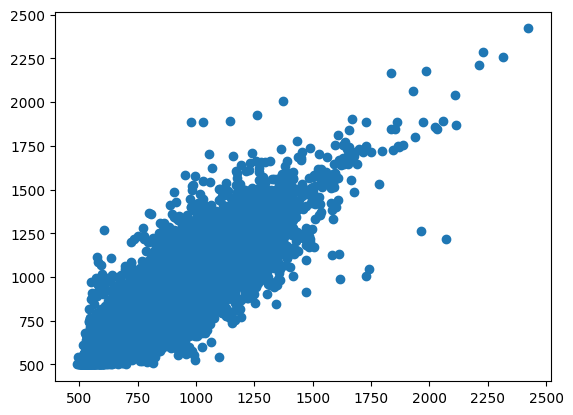

In [50]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)

In [51]:
# Forming another dataframe 'df2' for predicting 'status'

df2=df.drop(['selling_price'],axis=1)

In [52]:
# Considering only records with Won or Lost

df2=df2[(df2['status']=='Won') | (df2['status']=='Lost')]

In [53]:
# Binary encoding the column

df2['status']=df2['status'].apply(lambda x: 1 if x=='Won' else 0)

In [54]:
# Defining x and y for independent variables and target respectively

y=df2['status']
x=df2.drop('status',axis=1)

In [55]:
# Splitting the df into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [56]:
# Trying out random forest classifier.
# Found max_depth by hit and trial

from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(max_depth=15)
forest.fit(x_train,y_train)
print(forest.score(x_test,y_test))

0.8759545876861021


In [57]:
# Tried out tree classifier. Found max_depth by hit and trial

from sklearn import tree

c_tree = tree.DecisionTreeClassifier(max_depth=18)
c_tree.fit(x_train,y_train)
print(c_tree.score(x_test,y_test))

0.8757506401685966


In [58]:
# checking the relevant scores

from sklearn.metrics import classification_report

y_pred = c_tree.predict(x_test)
result = classification_report(y_test,y_pred)
print (result)

              precision    recall  f1-score   support

           0       0.74      0.73      0.73     10335
           1       0.92      0.92      0.92     33794

    accuracy                           0.88     44129
   macro avg       0.83      0.82      0.83     44129
weighted avg       0.88      0.88      0.88     44129



In [59]:
# 113063 out of 147095 i.e. 77% of data is 'Won'
# So we need to try out operations like undersampling, oversampling, smote etc

df2['status'][df2['status']==1].sum()

113063

In [60]:
# Trying undersampling

from imblearn.under_sampling import RandomUnderSampler
rs = RandomUnderSampler(random_state=42)
x1,y1 = rs.fit_resample(x,y)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30)

c_tree.fit(x_train,y_train)
print(c_tree.score(x_test,y_test))

0.8472575905974534


In [62]:
# Trying random over-sampling

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x2,y2 = ros.fit_resample(x,y)

In [63]:
# Trying tree classifier with over sampled data

x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.25)

c_tree.fit(x_train,y_train)
print(c_tree.score(x_test,y_test))

0.9174803651029505


In [ ]:
import pickle
with open('classifier','wb') as f:
    pickle.dump(c_tree,f)

In [64]:
y_pred = c_tree.predict(x_test)
result = classification_report(y_test,y_pred)
print (result)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     28191
           1       0.95      0.88      0.91     28341

    accuracy                           0.92     56532
   macro avg       0.92      0.92      0.92     56532
weighted avg       0.92      0.92      0.92     56532



In [65]:
# Trying out smote to create synthetic data
# and then apply random tree classifier

from imblearn.over_sampling import SMOTE
s = SMOTE(random_state=42)
x_smote, y_smote = s.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.30)
c_tree.fit(x_train,y_train)
print(c_tree.score(x_test,y_test))

0.9046994309973762


In [66]:
y_pred = c_tree.predict(x_test)
result = classification_report(y_test,y_pred)
print (result)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     33818
           1       0.93      0.88      0.90     34020

    accuracy                           0.90     67838
   macro avg       0.91      0.90      0.90     67838
weighted avg       0.91      0.90      0.90     67838

